'''
逻辑回归

适用：


'''

类别分布:
 Up
0    619
1    552
Name: count, dtype: int64
训练集准确率: 0.483
测试集准确率: 0.430

分类报告:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       134
           1       0.43      1.00      0.60       101

    accuracy                           0.43       235
   macro avg       0.21      0.50      0.30       235
weighted avg       0.18      0.43      0.26       235



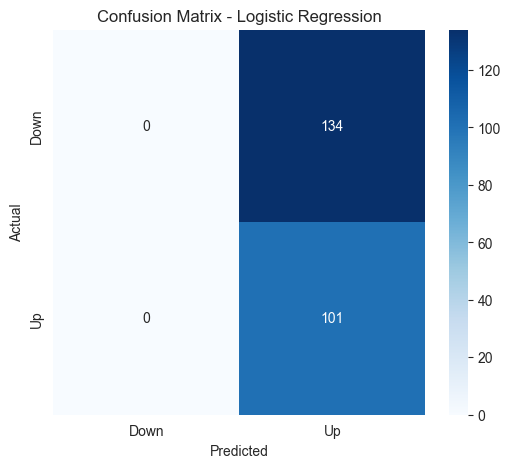

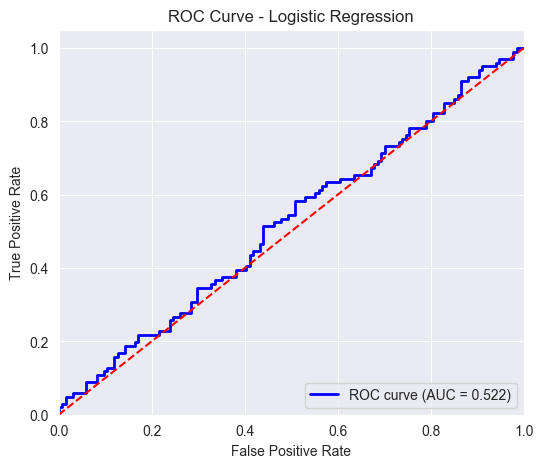

逻辑回归系数: [[-2.53291361e-15 -1.19109425e-15 -1.16328358e-15  1.39090502e-10]]
逻辑回归截距: [-6.69483577e-16]


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, auc
)
import seaborn as sns

# ---------------- 读取数据 ----------------
file_name = "../../dataset/raw/yf2014_2018.csv"
df_result = pd.read_csv(file_name)

# 将相关列转换为 float 类型
for col in ['Open', 'High', 'Low', 'Volume', 'Close']:
    df_result[col] = df_result[col].astype(float)

# 构造分类标签（收盘价是否大于开盘价）
df_result['Up'] = (df_result['Close'] > df_result['Open']).astype(int)

value = df_result['Up'].value_counts()
# 查看类别分布
print("类别分布:\n",value )

# 特征与目标
X = df_result[['Open','High','Low','Volume']]
y = df_result['Up']

# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# 创建逻辑回归模型
log_regressor = LogisticRegression(max_iter=5000)
log_regressor.fit(X_train, y_train)

# 预测
y_train_pred = log_regressor.predict(X_train)
y_test_pred = log_regressor.predict(X_test)

# 计算准确率
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"训练集准确率: {train_acc:.3f}")
print(f"测试集准确率: {test_acc:.3f}")

# 分类报告（避免 UndefinedMetricWarning）
print("\n分类报告:\n", classification_report(y_test, y_test_pred, zero_division=0))

# 混淆矩阵
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Down','Up'], yticklabels=['Down','Up'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# ROC 曲线
y_score = log_regressor.predict_proba(X_test)[:,1]  # 取预测为1的概率
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0,1], [0,1], color="red", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.show()

# 输出系数
print("逻辑回归系数:", log_regressor.coef_)
print("逻辑回归截距:", log_regressor.intercept_)
